In [51]:
#imports libraries
import pandas as pd
from statistics import stdev
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [56]:
#preparing the datasets

lw = pd.read_csv("/content/london_weather.csv") #reads london weather file from contents folder
aql = pd.read_excel("/content/air-quality-london.xlsx",2,skiprows=1) #reads london air quality file from contents folder

lw["date"] = pd.to_datetime((lw["date"]),format='%Y%m%d') # converts the dates column (weather) into date values

aql = aql.drop(aql.columns[8:], axis=1) #cuts out the "London Mean Background" data as the weather dataset was measured closer to the roadside (near Heathrow airport)

aql["Month"][:86] = pd.to_datetime(aql["Month"][:86],format='%b-%Y')
aql["Month"] = pd.to_datetime(aql["Month"],format='%Y-%m-%d %H:%M:%S')# converts the Month column (air quality) into date values

lwCompare = lw[10592:14457] #saves the portion of the weather data that can be compared to the air quality data (timeframe wise - Jan 2008 -> July 2018)

/tmp/ipython-input-56-2108249441.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  aql["Month"][:86] = pd.to_datetime(aql["Month"][:86],format='%b-%Y')
/tmp/ipython-input-56-2108249441.py:10: SettingWithCopyWarning: 
A value is trying to 

In [53]:
print("London Weather:","\n")
print(lw.info(),"\n")
print("London Air Quality:","\n")
print(aql.info())
#Info about both datasets

London Weather: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15322 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15322 non-null  float64       
 4   max_temp          15335 non-null  float64       
 5   mean_temp         15305 non-null  float64       
 6   min_temp          15339 non-null  float64       
 7   precipitation     15335 non-null  float64       
 8   pressure          15337 non-null  float64       
 9   snow_depth        13900 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB
None 

London Air Quality: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                      

/tmp/ipython-input-54-2659050300.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  lwPP["date"][i] = newDate
/tmp/ipython-input-54-2659050300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


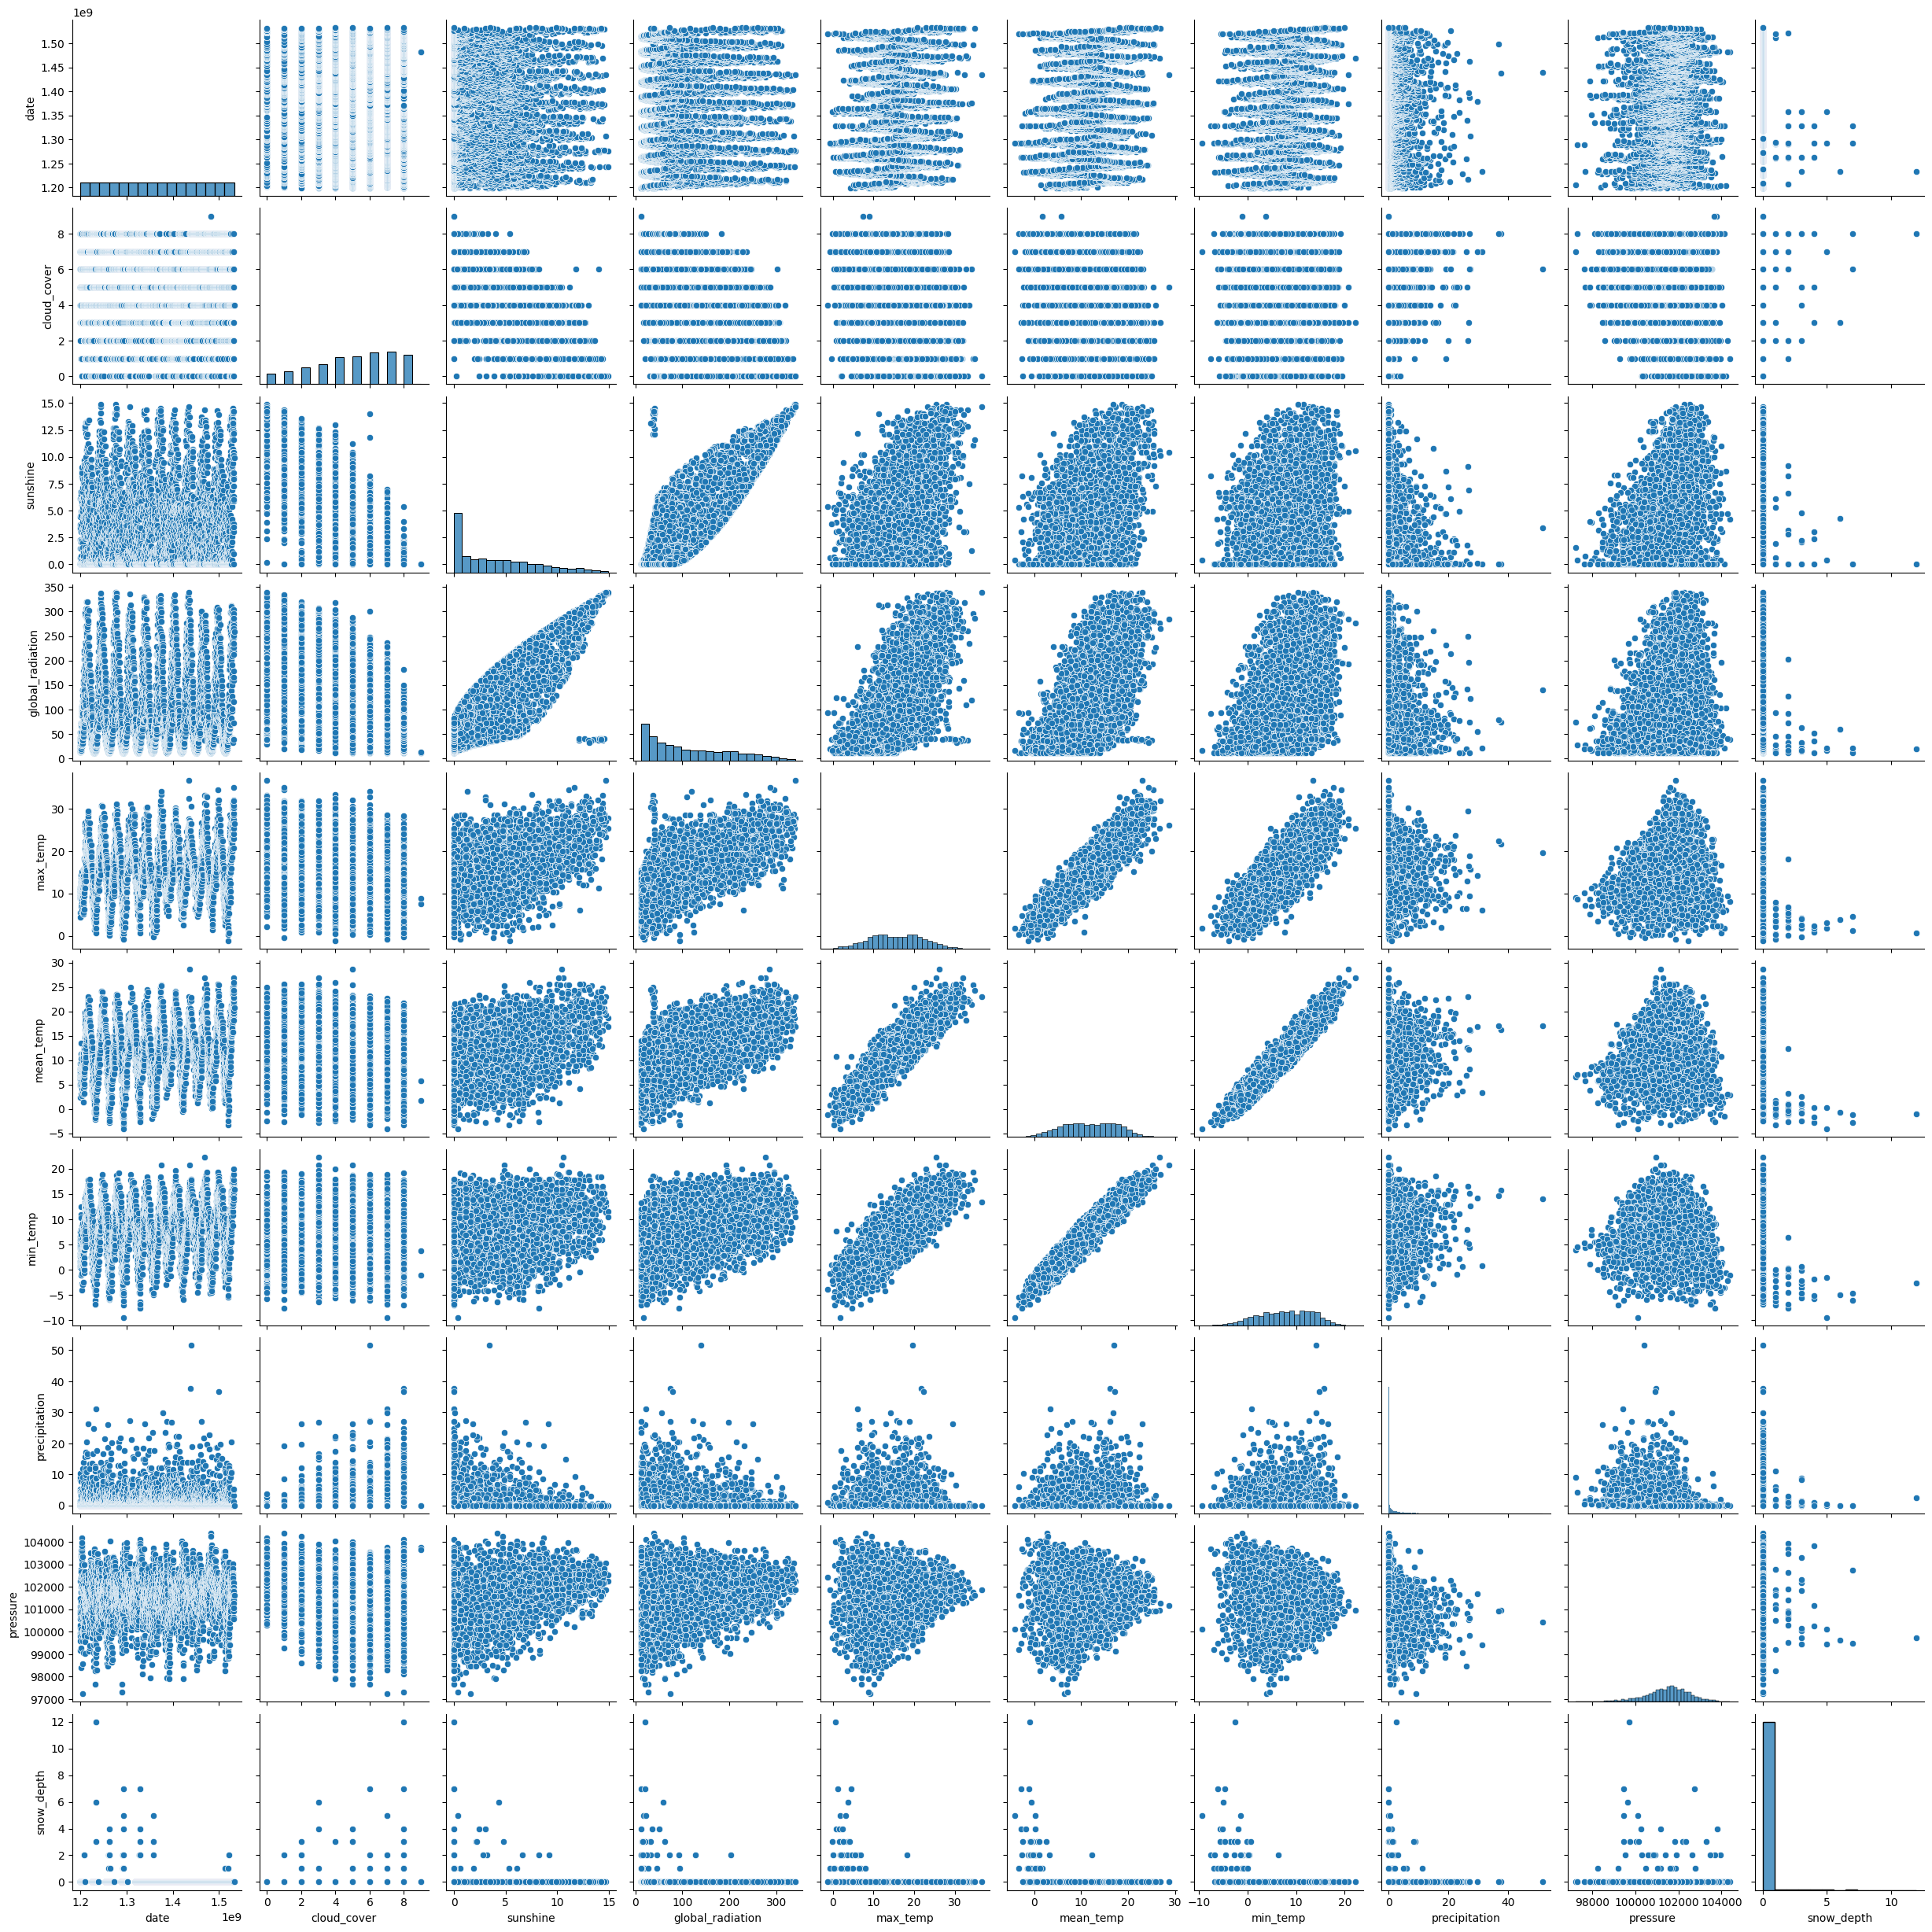

In [54]:
lwPP = lwCompare
for i in range(10592,14457):
  newDate = int((lwPP["date"])[i].timestamp())
  lwPP["date"][i] = newDate
#Only run the previous code ONCE (otherwise you must run the preparing datasets node again) or else an error will occur
#Code above produces series of data used specifically for the PairPlot (hence lwPP) as to allow dates to be part of it as well
sns.pairplot(lwPP, kind="scatter")
plt.show()

/tmp/ipython-input-55-970765692.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  aqlPP["Month"][i] = newDate
/tmp/ipython-input-55-970765692.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


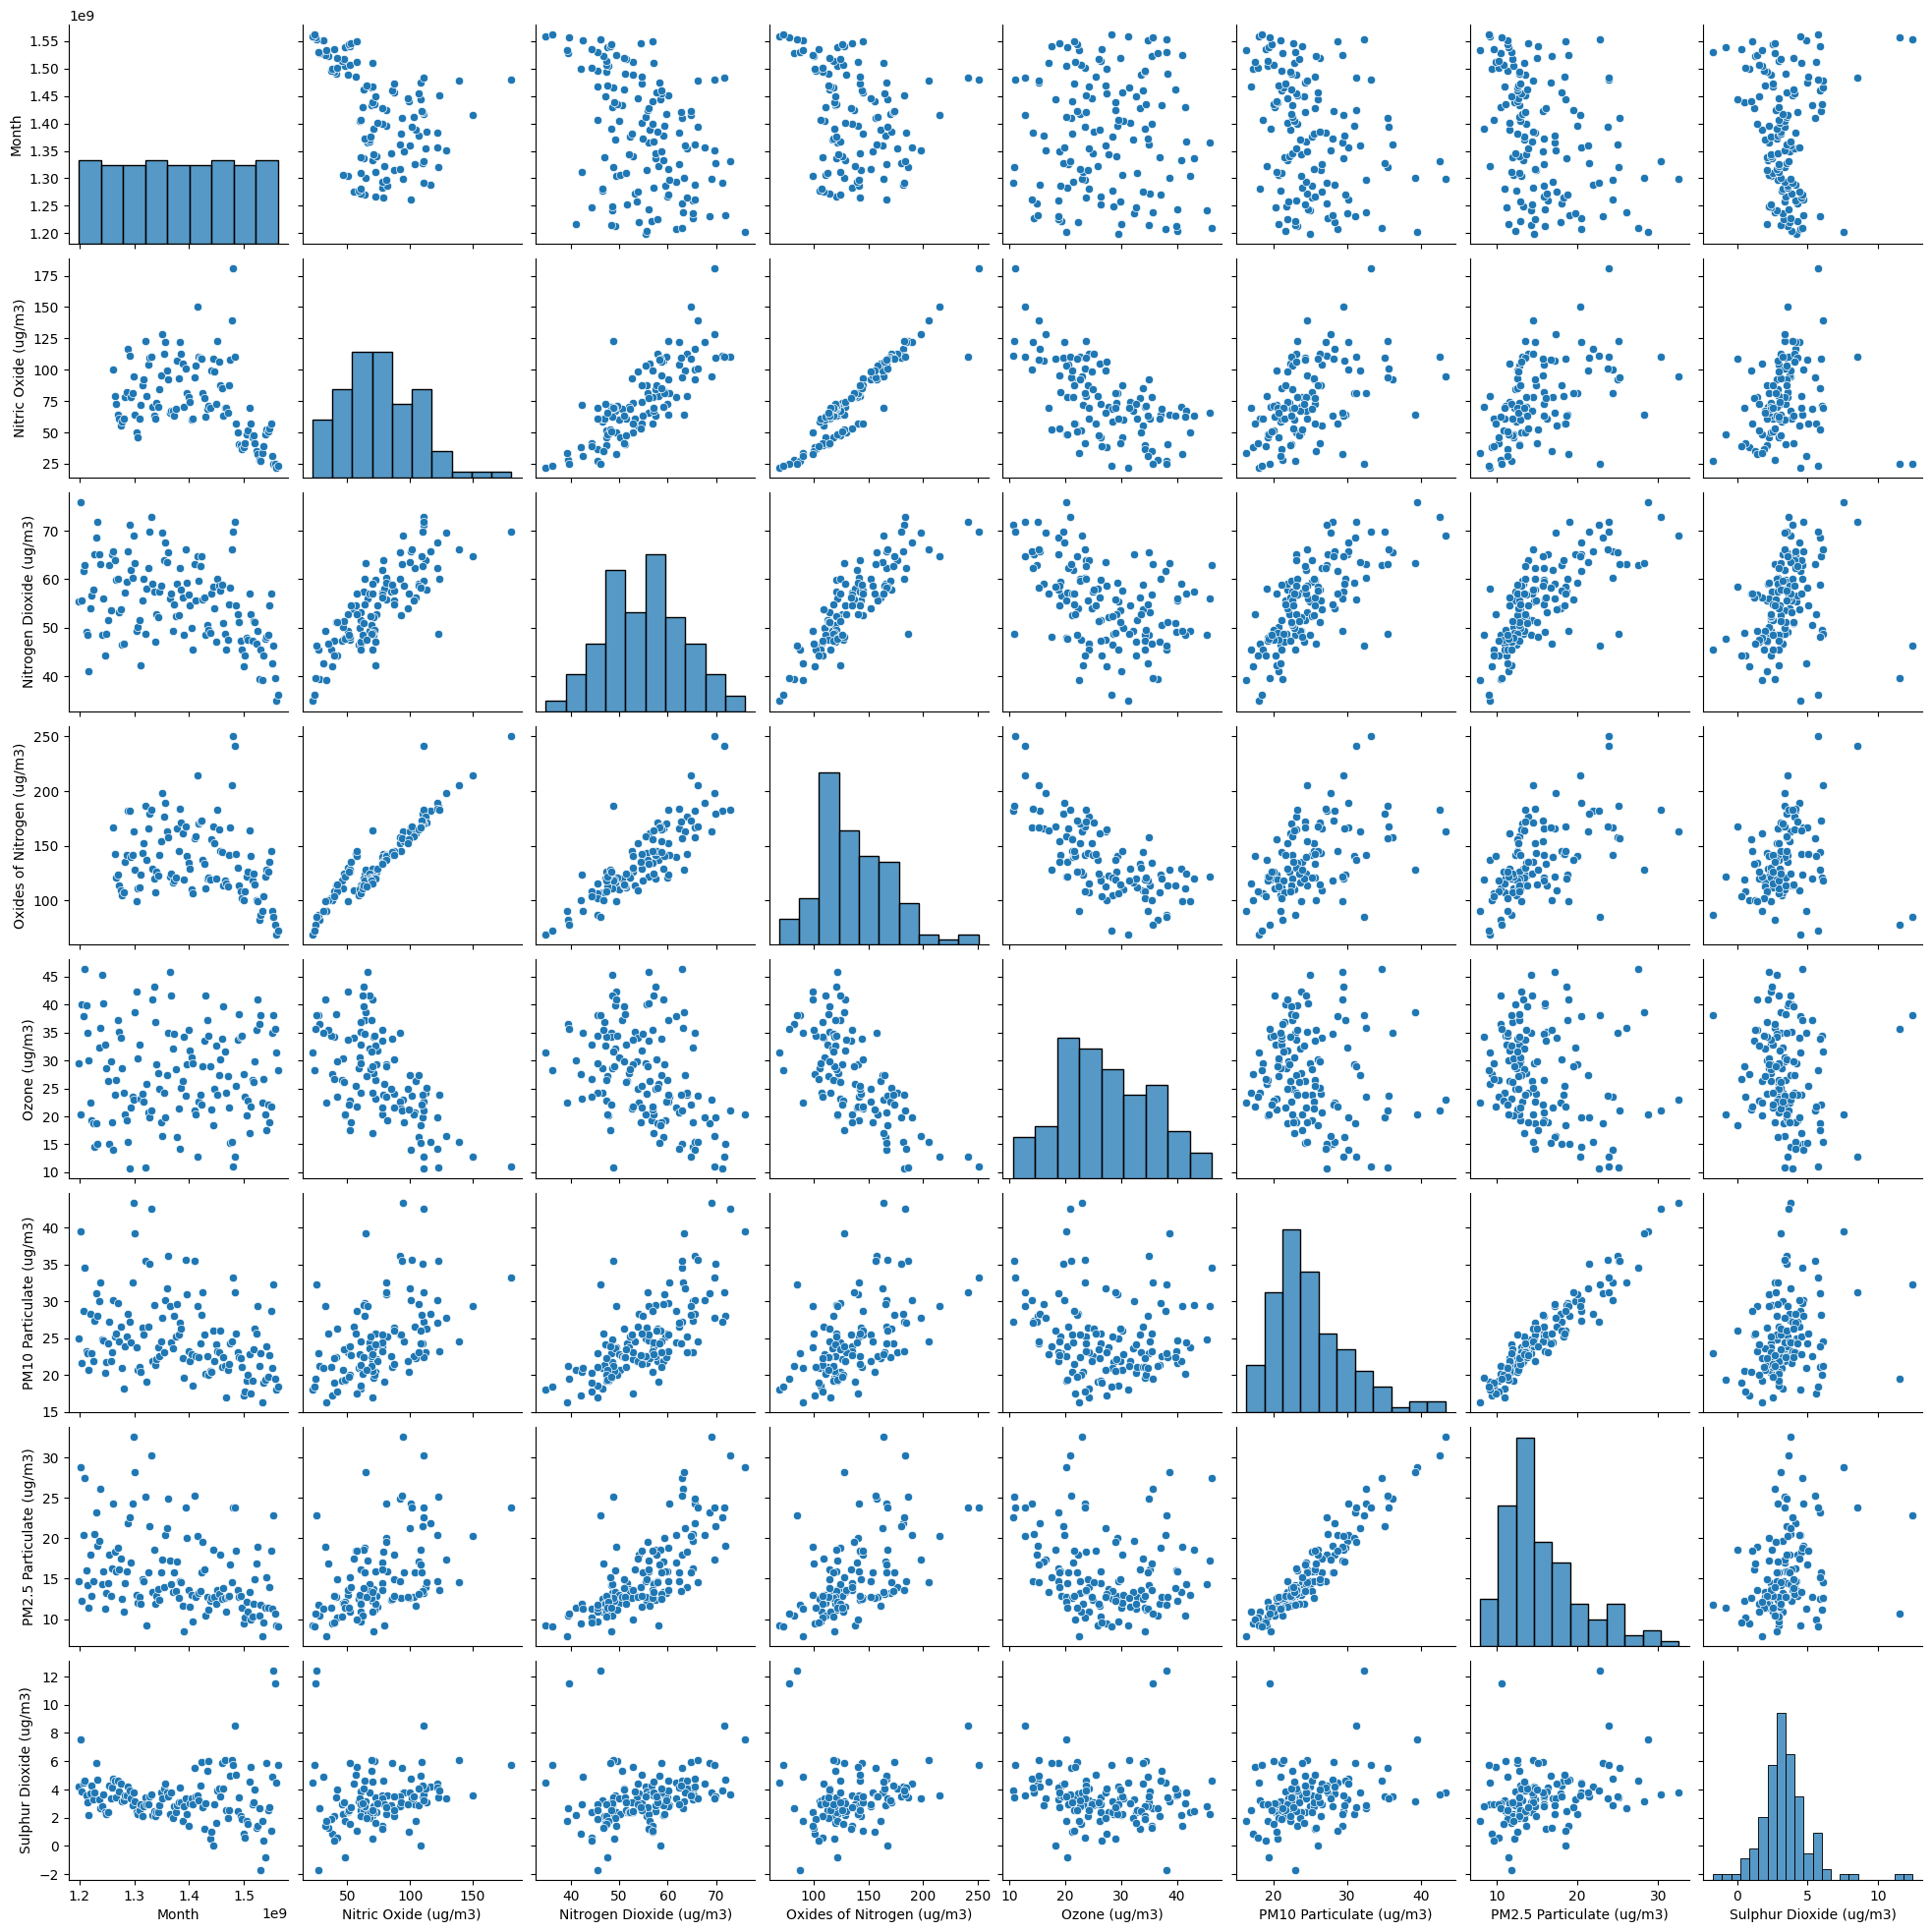

In [55]:
#Same code as above adapted for air quality dataset


aqlPP = aql
for i in range(139):
  newDate = int((aqlPP["Month"])[i].timestamp())
  aqlPP["Month"][i] = newDate
#Only run the previous code ONCE (otherwise you must run the preparing datasets node again) or else an error will occur
#Code above produces series of data used specifically for the PairPlot (hence aqlPP) as to allow dates to be part of it as well
sns.pairplot(aqlPP, kind="scatter")
plt.show()

In [58]:
lwCorr = lwCompare.corr(method='pearson')
print(lwCorr)
#London weather correlation matrix

                      date  cloud_cover  sunshine  global_radiation  max_temp  \
date              1.000000     0.015000  0.032108          0.002971  0.075315   
cloud_cover       0.015000     1.000000 -0.814698         -0.549935 -0.255448   
sunshine          0.032108    -0.814698  1.000000          0.826334  0.458519   
global_radiation  0.002971    -0.549935  0.826334          1.000000  0.680104   
max_temp          0.075315    -0.255448  0.458519          0.680104  1.000000   
mean_temp         0.077068    -0.154566  0.380473          0.622899  0.915291   
min_temp          0.072331     0.025477  0.192634          0.462384  0.816994   
precipitation    -0.008301     0.236001 -0.242766         -0.172893 -0.088216   
pressure          0.047327    -0.257994  0.259083          0.179482  0.147966   
snow_depth       -0.096921     0.050886 -0.061432         -0.078717 -0.163795   

                  mean_temp  min_temp  precipitation  pressure  snow_depth  
date               0.077068  0.

In [57]:
aqlCorr = aql.corr(method='pearson')
print(aqlCorr)
#London air quality correlation matrix

                               Month  Nitric Oxide (ug/m3)  \
Month                       1.000000             -0.405267   
Nitric Oxide (ug/m3)       -0.405267              1.000000   
Nitrogen Dioxide (ug/m3)   -0.424247              0.801844   
Oxides of Nitrogen (ug/m3) -0.260657              0.935889   
Ozone (ug/m3)              -0.022861             -0.613033   
PM10 Particulate (ug/m3)   -0.325758              0.467200   
PM2.5 Particulate (ug/m3)  -0.365820              0.470421   
Sulphur Dioxide (ug/m3)    -0.028236              0.137670   

                            Nitrogen Dioxide (ug/m3)  \
Month                                      -0.424247   
Nitric Oxide (ug/m3)                        0.801844   
Nitrogen Dioxide (ug/m3)                    1.000000   
Oxides of Nitrogen (ug/m3)                  0.851787   
Ozone (ug/m3)                              -0.418834   
PM10 Particulate (ug/m3)                    0.706408   
PM2.5 Particulate (ug/m3)                   0.725